In [ ]:
## Step 7 — Optional: Add Calendar / Exhogenous Features

# (1) Calender events - comparison of Monthly Medians against global average median

import pandas as pd

# Load data
df = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Aggregate to weekly sales
weekly = (
    df.groupby(pd.Grouper(key="Order Date", freq="W"))
      .agg({"Sales": "sum"})
      .reset_index()
      .sort_values("Order Date")
      .reset_index(drop=True)
)

# Add calendar month
weekly["Month"] = weekly["Order Date"].dt.month

# Global median of weekly sales
global_median = weekly["Sales"].median()

# Monthly median of weekly sales
monthly_median = (
    weekly.groupby("Month")["Sales"]
          .median()
          .reset_index(name="Monthly_Median")
)

# Compare with global median
monthly_median["Global_Median"] = global_median
monthly_median["Pct_Deviation_From_Global"] = (
    (monthly_median["Monthly_Median"] - global_median) / global_median * 100
)

# Map month number to name for readability
monthly_median["Month_Name"] = pd.to_datetime(
    monthly_median["Month"], format="%m"
).dt.strftime("%B")

# Reorder columns for clarity
monthly_median = monthly_median[
    ["Month", "Month_Name", "Monthly_Median", "Global_Median", "Pct_Deviation_From_Global"]
]

print(monthly_median)


    Month Month_Name  Monthly_Median  Global_Median  Pct_Deviation_From_Global
0       1    January     78223.55025    66642.27775                  17.378266
1       2   February     64445.18825    66642.27775                  -3.296840
2       3      March     72260.75150    66642.27775                   8.430795
3       4      April     57701.62600    66642.27775                 -13.415886
4       5        May     66116.42300    66642.27775                  -0.789071
5       6       June     53363.42125    66642.27775                 -19.925574
6       7       July     70197.92850    66642.27775                   5.335428
7       8     August     61415.72850    66642.27775                  -7.842693
8       9  September     68852.55050    66642.27775                   3.316622
9      10    October     74619.16075    66642.27775                  11.969703
10     11   November     62955.95975    66642.27775                  -5.531501
11     12   December     81937.51975    66642.27775 

In [ ]:
# (2) Calender events - comparison of weekly medians against Global average median for week

import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Weekly aggregation
weekly = (
    df.groupby(pd.Grouper(key="Order Date", freq="W"))
      .agg({"Sales": "sum"})
      .reset_index()
      .sort_values("Order Date")
)

# Calendar fields
weekly["Year"] = weekly["Order Date"].dt.year
weekly["Month"] = weekly["Order Date"].dt.month

# Global median per year
yearly_global_median = (
    weekly.groupby("Year")["Sales"]
          .median()
          .rename("Year_Global_Median")
          .reset_index()
)

# Monthly median per year
year_month_median = (
    weekly.groupby(["Year", "Month"])["Sales"]
          .median()
          .reset_index(name="Month_Median")
)

# Merge global median
df_cmp = year_month_median.merge(
    yearly_global_median,
    on="Year",
    how="left"
)

# Direction sign
df_cmp["Direction"] = np.where(
    df_cmp["Month_Median"] > df_cmp["Year_Global_Median"], "+", "-"
)

# Month name (readability)
df_cmp["Month_Name"] = pd.to_datetime(
    df_cmp["Month"], format="%m"
).dt.strftime("%B")

# Final table
df_cmp = df_cmp[
    ["Year", "Month", "Month_Name", "Month_Median", "Year_Global_Median", "Direction"]
].sort_values(["Month", "Year"])

print(df_cmp)


    Year  Month Month_Name  Month_Median  Year_Global_Median Direction
0   2012      1    January  100202.66000         77424.84000         +
12  2013      1    January   66498.56050         62742.68325         +
24  2014      1    January   46473.55925         61033.09925         -
36  2015      1    January   89376.30650         71261.22675         +
48  2016      1    January   24763.65000         24763.65000         -
1   2012      2   February   89197.55775         77424.84000         +
13  2013      2   February   46797.35100         62742.68325         -
25  2014      2   February   70258.69150         61033.09925         +
37  2015      2   February   54072.56000         71261.22675         -
2   2012      3      March   74974.12750         77424.84000         -
14  2013      3      March   44866.29150         62742.68325         -
26  2014      3      March   60551.42600         61033.09925         -
38  2015      3      March   86935.49350         71261.22675         +
3   20

In [ ]:
# (3) Calender events - comparison of weekly dispersion (Std deviation) 

import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Aggregate to weekly sales
weekly = (
    df.groupby(pd.Grouper(key="Order Date", freq="W"))
      .agg({"Sales": "sum"})
      .reset_index()
      .sort_values("Order Date")
)

# Calendar fields
weekly["Year"] = weekly["Order Date"].dt.year
weekly["Month"] = weekly["Order Date"].dt.month

# Step 1: Weekly volatility inside each (Year, Month)
year_month_vol = (
    weekly.groupby(["Year", "Month"])["Sales"]
          .std()
          .reset_index(name="Month_Weekly_STD")
)

# Step 2: Typical volatility per year (baseline)
yearly_vol_baseline = (
    year_month_vol.groupby("Year")["Month_Weekly_STD"]
                  .median()
                  .reset_index(name="Year_Median_STD")
)

# Step 3: Merge baseline
vol_cmp = year_month_vol.merge(
    yearly_vol_baseline,
    on="Year",
    how="left"
)

# Step 4: Direction of volatility
vol_cmp["Volatility_Direction"] = np.where(
    vol_cmp["Month_Weekly_STD"] > vol_cmp["Year_Median_STD"], "+", "-"
)

# Month name for readability
vol_cmp["Month_Name"] = pd.to_datetime(
    vol_cmp["Month"], format="%m"
).dt.strftime("%B")

# Final table
vol_cmp = vol_cmp[
    ["Year", "Month", "Month_Name", "Month_Weekly_STD",
     "Year_Median_STD", "Volatility_Direction"]
].sort_values(["Month", "Year"])

print(vol_cmp)


    Year  Month Month_Name  Month_Weekly_STD  Year_Median_STD  \
0   2012      1    January      71190.016335     21506.899624   
12  2013      1    January      35933.037018     23700.384030   
24  2014      1    January      40050.419619     22431.920931   
36  2015      1    January       7294.816458     16763.001549   
48  2016      1    January               NaN              NaN   
1   2012      2   February      11963.773282     21506.899624   
13  2013      2   February      21261.108519     23700.384030   
25  2014      2   February      24290.659725     22431.920931   
37  2015      2   February       9757.527830     16763.001549   
2   2012      3      March      68609.191656     21506.899624   
14  2013      3      March      34583.266619     23700.384030   
26  2014      3      March      17987.235961     22431.920931   
38  2015      3      March      24752.373516     16763.001549   
3   2012      4      April      35565.435673     21506.899624   
15  2013      4      Apri

In [ ]:
# (4) Identificaton of weeks with outliers (MAD based anomolies)

import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
df["Order Date"] = pd.to_datetime(df["Order Date"])

# Aggregate to weekly sales
weekly = (
    df.groupby(pd.Grouper(key="Order Date", freq="W"))
      .agg({"Sales": "sum"})
      .reset_index()
      .sort_values("Order Date")
      .reset_index(drop=True)
)

# --- MAD-based anomaly detection ---
median_sales = weekly["Sales"].median()
mad = np.median(np.abs(weekly["Sales"] - median_sales))

# Safety check (should not happen, but keeps code robust)
if mad == 0:
    raise ValueError("MAD is zero; cannot compute robust scores.")

# Robust score (symmetric for peaks and troughs)
weekly["robust_score"] = np.abs(weekly["Sales"] - median_sales) / mad

# Threshold (conservative)
k = 3.0
weekly["is_anomaly"] = weekly["robust_score"] >= k

# Direction for interpretation
weekly["direction"] = np.where(
    weekly["Sales"] > median_sales, "peak", "trough"
)

# --- Merge consecutive anomalous weeks into event windows ---
weekly["event_id"] = (
    weekly["is_anomaly"]
    .ne(weekly["is_anomaly"].shift())
    .cumsum()
)

event_windows = (
    weekly[weekly["is_anomaly"]]
    .groupby("event_id")
    .agg(
        start_date=("Order Date", "min"),
        end_date=("Order Date", "max"),
        duration_weeks=("Order Date", "count"),
        max_score=("robust_score", "max"),
        dominant_direction=("direction", lambda x: x.value_counts().idxmax())
    )
    .reset_index(drop=True)
)

print("Global median weekly sales:", round(median_sales, 2))
print("MAD:", round(mad, 2))
print("\nAnomalous weeks:", weekly["is_anomaly"].sum())
print("Event windows:", len(event_windows))
print("\nEvent windows preview:")
print(event_windows.head(10))


Global median weekly sales: 66642.28
MAD: 18175.18

Anomalous weeks: 12
Event windows: 11

Event windows preview:
  start_date   end_date  duration_weeks  max_score dominant_direction
0 2012-01-01 2012-01-08               2   7.005662             trough
1 2012-03-25 2012-03-25               1   7.120813               peak
2 2012-04-22 2012-04-22               1   4.229966               peak
3 2012-10-21 2012-10-21               1   3.958266               peak
4 2013-01-13 2013-01-13               1   3.390895               peak
5 2013-07-14 2013-07-14               1   3.222587             trough
6 2013-09-15 2013-09-15               1   4.484599               peak
7 2013-09-29 2013-09-29               1   4.769284               peak
8 2014-05-04 2014-05-04               1   3.453211               peak
9 2014-07-06 2014-07-06               1   3.085921               peak


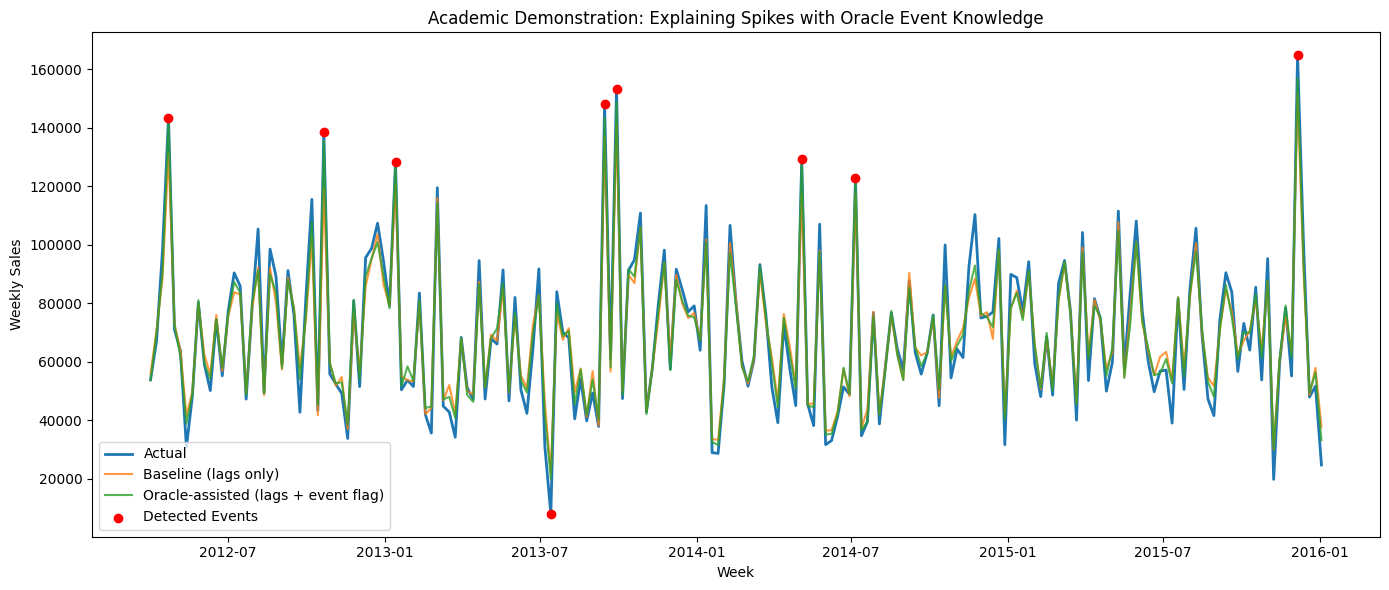

In [ ]:
# (5) Oracle Event Knowledge of MAD based anomoly flags.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBRegressor

# -----------------------------
# Load and prepare weekly data
# -----------------------------
df = pd.read_csv("/home/surendran/rag_local/data/walmart Retail Data.csv")
df["Order Date"] = pd.to_datetime(df["Order Date"])

weekly = (
    df.groupby(pd.Grouper(key="Order Date", freq="W"))
      .agg({"Sales": "sum"})
      .reset_index()
      .sort_values("Order Date")
      .reset_index(drop=True)
)

# -----------------------------
# MAD-based anomaly flag (oracle)
# -----------------------------
median_sales = weekly["Sales"].median()
mad = np.median(np.abs(weekly["Sales"] - median_sales))

k = 3.0
weekly["is_event"] = (
    np.abs(weekly["Sales"] - median_sales) / mad >= k
).astype(int)

# -----------------------------
# Lag features (dense: 1–13)
# -----------------------------
max_lag = 13
for lag in range(1, max_lag + 1):
    weekly[f"lag_{lag}"] = weekly["Sales"].shift(lag)

weekly = weekly.dropna().reset_index(drop=True)

# -----------------------------
# Feature sets
# -----------------------------
lag_cols = [f"lag_{i}" for i in range(1, max_lag + 1)]

X_base = weekly[lag_cols]
X_oracle = weekly[lag_cols + ["is_event"]]
y = weekly["Sales"]

# -----------------------------
# Models
# -----------------------------
base_model = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

oracle_model = XGBRegressor(
    n_estimators=300,
    max_depth=3,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Fit on full data (academic, explanatory)
base_model.fit(X_base, y)
oracle_model.fit(X_oracle, y)

# Predictions
weekly["pred_base"] = base_model.predict(X_base)
weekly["pred_oracle"] = oracle_model.predict(X_oracle)

# -----------------------------
# Plot
# -----------------------------
plt.figure(figsize=(14, 6))
plt.plot(weekly["Order Date"], weekly["Sales"], label="Actual", linewidth=2)
plt.plot(weekly["Order Date"], weekly["pred_base"], label="Baseline (lags only)", alpha=0.8)
plt.plot(weekly["Order Date"], weekly["pred_oracle"], label="Oracle-assisted (lags + event flag)", alpha=0.8)

# Highlight event weeks
event_weeks = weekly[weekly["is_event"] == 1]
plt.scatter(event_weeks["Order Date"], event_weeks["Sales"],
            color="red", label="Detected Events", zorder=5)

plt.title("Academic Demonstration: Explaining Spikes with Oracle Event Knowledge")
plt.xlabel("Week")
plt.ylabel("Weekly Sales")
plt.legend()
plt.tight_layout()
plt.show()
